# GP regression with GPyTorch

In [1]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

In [88]:
# We will use the simplest form of GP model, exact inference
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        # self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
        self.covar_module = gpytorch.kernels.RBFKernel()
        self.covar_module.lengthscale = 0.4
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood(noise_constraint=gpytorch.constraints.Interval(0.0,1e-14))
train_x = torch.rand(12).reshape(-1,6)
train_y = (torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * math.sqrt(0.04)).mean(1)
model = ExactGPModel(train_x, train_y, likelihood)

In [89]:
train_x.shape

torch.Size([2, 6])

In [90]:
train_y.shape

torch.Size([2])

In [91]:
model.eval()
model(train_x)

/Users/abauville/opt/anaconda3/lib/python3.9/site-packages/gpytorch/models/exact_gp.py:273: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


MultivariateNormal(loc: torch.Size([2]))

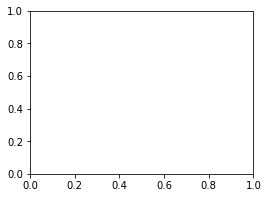

In [97]:
model.eval()
likelihood.eval()
f, ax = plt.subplots(1, 1, figsize=(4, 3))
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_x = torch.stack([torch.linspace(0, 1, 21) for i in range(6)]).T
    observed_pred = likelihood(model(test_x))
    lower, upper = observed_pred.confidence_region()
    # ax.plot(train_x.numpy(), train_y.numpy(), 'k*')
    # ax.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b')
    # ax.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    # ax.set_ylim([-3, 3])
    # ax.legend(['Observed Data', 'Mean', 'Confidence'])

In [95]:
test_x.shape

torch.Size([21, 6])

In [45]:
train_x.reshape(1,6,2).shape

torch.Size([1, 6, 2])